# Process data EEG feeltrace

## Loading EEG data

In [1]:
!pip install mne
!pip install catch22

In [1]:
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
import pandas as pd
import mne
from catch22 import catch22_all

from mne.preprocessing import create_ecg_epochs, create_eog_epochs


Bad key "text.kerning_factor" on line 4 in
/Users/Qianqian/anaconda3/envs/ml/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
p2_eeg = loadmat('data/p2_eeg.mat')
p2_eeg_df = pd.DataFrame(p2_eeg['p2_eeg'])
p2_eeg_df = p2_eeg_df.rename(lambda x: x+1, axis='columns')
p2_eeg_df.insert(0, 'timestamp_ms', np.arange(p2_eeg_df.shape[0]))
p2_eeg_df = p2_eeg_df.drop(columns=[65])

In [3]:
p2_eeg_df

,timestamp_ms,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,-6435.210449,-8316.973633,492.944885,1404.833740,-7257.807129,-901.238464,242.817108,-15975.132812,-522.508850,...,2778.904541,-6184.883789,-6892.368652,-641.983337,-2425.445068,-7416.185547,-1701.274658,1147.051514,-1324.591309,-694.856873
1,1,-6457.062012,-8321.794922,487.974091,1402.181396,-7271.803223,-904.998535,241.029190,-15981.425781,-530.608887,...,2756.933350,-6152.960938,-6894.318359,-652.864868,-2429.531982,-7423.056641,-1721.613770,1133.590088,-1346.059448,-734.118591
2,2,-6440.391602,-8326.649414,489.753082,1404.613892,-7271.342773,-901.404419,240.730896,-15975.419922,-524.699890,...,2763.450195,-6145.101074,-6899.665039,-641.445435,-2436.177246,-7424.788086,-1703.821411,1148.293945,-1325.429199,-703.355774
3,3,-6439.343262,-8330.418945,493.173004,1405.103516,-7258.800293,-900.445007,239.473068,-15970.718750,-521.045288,...,2767.429932,-6185.363281,-6904.002930,-644.182678,-2437.245850,-7422.971680,-1695.515259,1154.135010,-1299.729004,-662.273743
4,4,-6443.694824,-8327.436523,497.058533,1406.041382,-7247.469238,-897.518188,241.212524,-15966.178711,-516.038940,...,2766.936768,-6165.060547,-6899.393066,-650.036438,-2432.305420,-7416.296875,-1700.826050,1148.333740,-1295.415161,-672.435730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732541,732541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
732542,732542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
732543,732543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
732544,732544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Artifact removal

In [4]:
channel_names = [ 'E' + str(i+1) for i in range(64)]
sampling_rate = 1000
ch_types = 'eeg'
info = mne.create_info(channel_names, sampling_rate, ch_types)
p2_raw = mne.io.RawArray(p2_eeg_df.iloc[:,1:].transpose()/(10 ** 6), info)

Creating RawArray with float64 data, n_channels=64, n_times=732546
    Range : 0 ... 732545 =      0.000 ...   732.545 secs
Ready.


Effective window size : 2.048 (s)


<ipython-input-5-2049165b6172>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  p2_raw.plot_psd(area_mode='range', tmax=10.0, average=False) # power spectual density


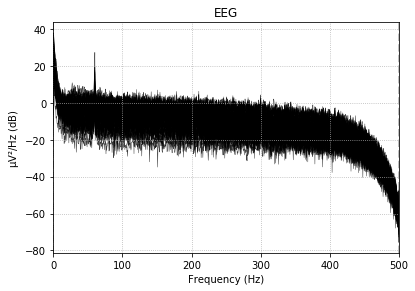

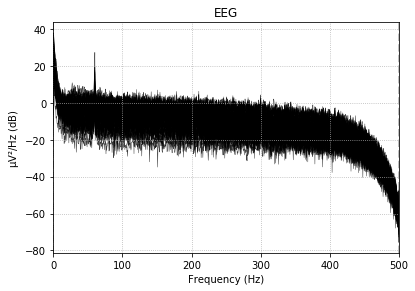

In [5]:
p2_raw.plot_psd(area_mode='range', tmax=10.0, average=False) # power spectual density

In [6]:
p2_filtered = p2_raw.notch_filter(60, filter_length='auto',phase='zero')

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 sec)



Effective window size : 2.048 (s)


<ipython-input-7-c4605fd1d547>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  p2_raw.plot_psd(area_mode='range', tmax=10.0, average=False)


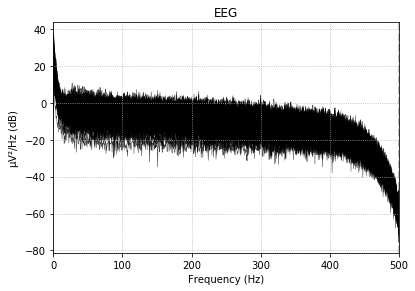

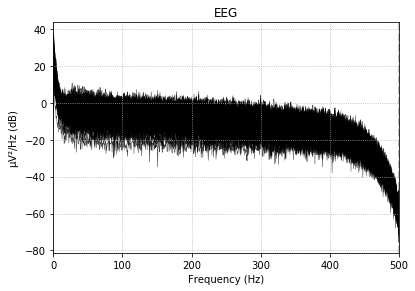

In [7]:
p2_raw.plot_psd(area_mode='range', tmax=10.0, average=False)

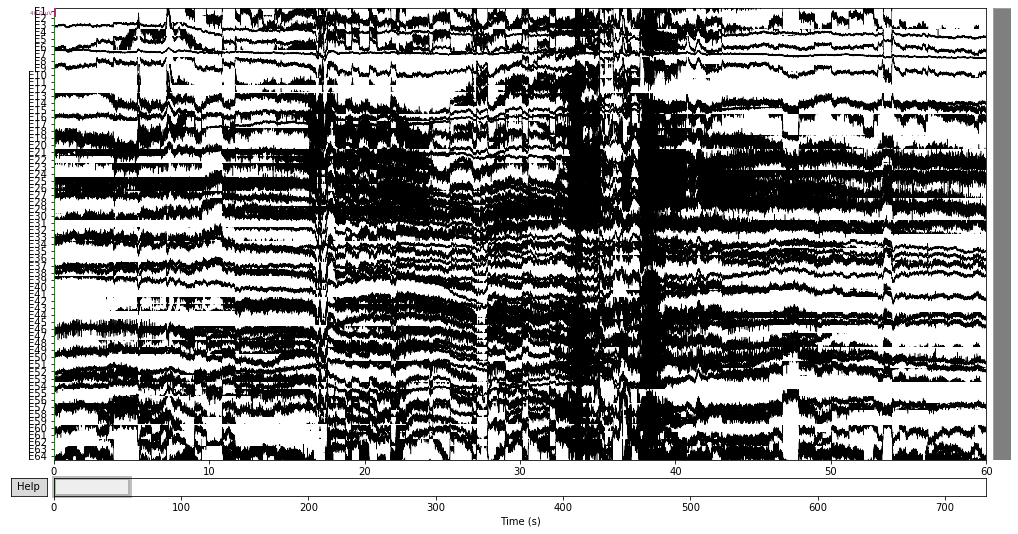

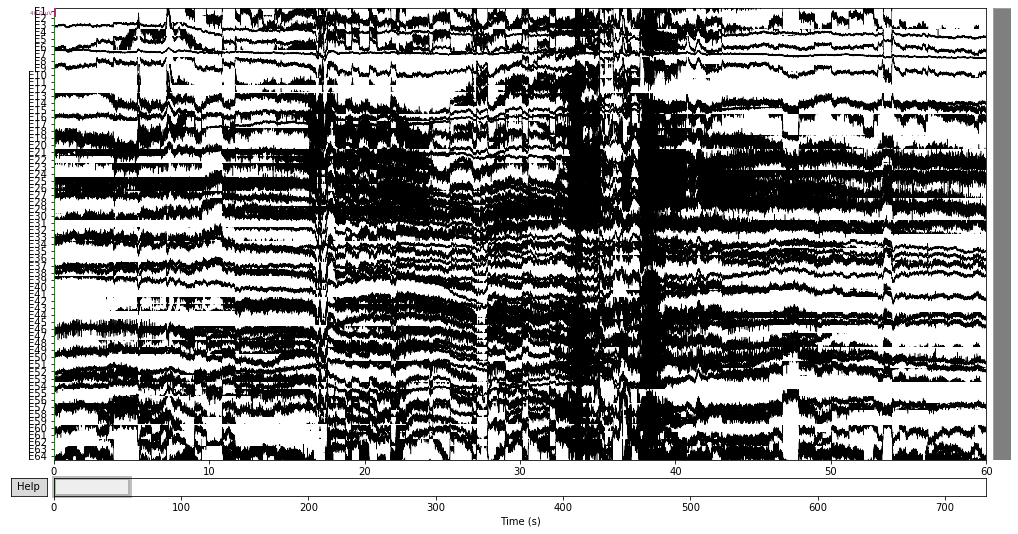

In [8]:
(p2_raw.copy().pick_types(eeg=True)
             .del_proj('all')
           .plot(duration=60, n_channels=64))

Effective window size : 2.048 (s)


<ipython-input-9-270099ab070e>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  p2_filtered.plot_psd(tmax=np.inf, fmax=500)


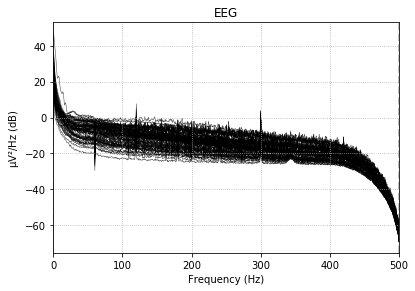

Effective window size : 2.048 (s)


<ipython-input-9-270099ab070e>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  p2_filtered.plot_psd(area_mode='range', tmax=10.0, average=False)


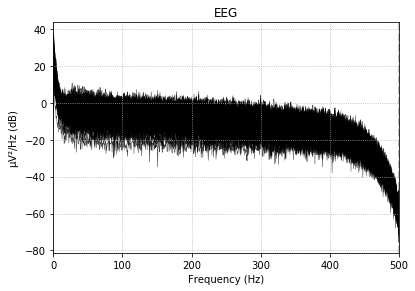

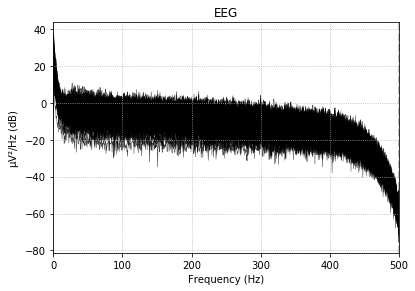

In [9]:
p2_filtered.plot_psd(tmax=np.inf, fmax=500)
p2_filtered.plot_psd(area_mode='range', tmax=10.0, average=False)

In [29]:
average_ecg = create_ecg_epochs(p2_raw).average()
print('We found %i ECG events' % average_ecg.nave)
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
average_ecg.plot_joint(**joint_kwargs)

ValueError: Unable to generate artificial ECG channel

Load Feeltrace

In [6]:
p2_feeltrace = loadmat('data/p2_feeltrace.mat')

In [7]:
p2_feeltrace_df = pd.DataFrame(p2_feeltrace['p2_feeltrace'], columns=['timestamp_ms', 'feeltrace'])

In [8]:
p2_feeltrace_df['timestamp_ms']

0         44018.0
1         44036.0
2         44074.0
3         44111.0
4         44139.0
           ...   
18612    658533.0
18613    658571.0
18614    658598.0
18615    658637.0
18616    658661.0
Name: timestamp_ms, Length: 18617, dtype: float64

In [9]:
p2_feeltrace = p2_feeltrace_df.to_numpy()
new_timestamp = np.arange(p2_feeltrace[0,0], p2_feeltrace[-1,0], 1000/3)
p2_feeltrace_even = np.interp(new_timestamp, p2_feeltrace[:,0], p2_feeltrace[:,1])
p2_feeltrace_slope = np.zeros((1841))
for i in range(3):
  p2_feeltrace_slope[i::3] = np.diff(p2_feeltrace_even[i::3])
p2_feeltrace_slope

array([ 0.        ,  0.        , -0.45977011, ...,  0.        ,
        0.        ,  0.56499356])

(array([   3.,    5.,   11.,   30.,  193., 1498.,   73.,   20.,    4.,
           4.]),
 array([-98.77777778, -80.10598291, -61.43418803, -42.76239316,
        -24.09059829,  -5.41880342,  13.25299145,  31.92478632,
         50.5965812 ,  69.26837607,  87.94017094]),
 <a list of 10 Patch objects>)

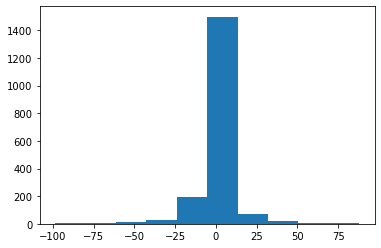

In [10]:
%matplotlib inline
plt.hist(p2_feeltrace_slope)

In [38]:
np.save('data_label.npy', p2_feeltrace_slope[:1839])

In [11]:
np.save('data/data_feeltrace_300hz.npy', p2_feeltrace_even[:1839])

Process features with catch 22, using 300Hz data

In [11]:
# %matplotlib qt
sfreq = 300
tmin = p2_feeltrace_df['timestamp_ms'][0] / 1000 # ms to s
tmax = np.array(p2_feeltrace_df['timestamp_ms'])[-1] / 1000 # ms to s
p2_300hz = p2_raw.copy().crop(tmin, tmax).resample(sfreq, npad='auto') # gamma band 40Hz - 140Hz

# p2_300hz.plot(duration=5, n_channels=20)

In [63]:
data = p2_300hz.get_data()
rolling_window_offset = 100 # 1/3 s
num_second = data.shape[1] // sfreq - 1
test = np.zeros((64, sfreq, num_second * sfreq // rolling_window_offset))
for i in range(sfreq//rolling_window_offset):
    data_0 = data[:, (i * rolling_window_offset):(num_second * sfreq + i * rolling_window_offset)]
    test[:,:,i::3] = data_0.reshape((64, sfreq, num_second), order='F')
        
pd.DataFrame(test[:,:5,0])

,0,1,2,3,4
0,-0.006643,-0.006641,-0.006634,-0.006643,-0.006655
1,-0.008000,-0.008021,-0.008010,-0.008003,-0.008017
2,0.000224,0.000222,0.000230,0.000228,0.000221
3,0.001355,0.001358,0.001361,0.001358,0.001356
4,-0.006879,-0.006883,-0.006865,-0.006878,-0.006862
...,...,...,...,...,...
59,-0.007081,-0.007086,-0.007084,-0.007083,-0.007086
60,-0.001772,-0.001769,-0.001758,-0.001770,-0.001781
61,0.001440,0.001447,0.001467,0.001452,0.001440
62,-0.001522,-0.001514,-0.001522,-0.001526,-0.001526


In [66]:
def feature_aggregation(arr):
    return np.array(catch22_all(arr)['values'])

Legacy data processing and saving code, for a quick load, use `.npy` files from `data` folder  
took a lot of memory to run, hence separated into two parts

In [67]:
data_feat_aggregated = np.apply_along_axis(feature_aggregation, 1, test[:,:,:900])

In [68]:
data_feat_aggregated = data_feat_aggregated.reshape((64 * 22, 900))
data_feat_aggregated = data_feat_aggregated.T
data_feat_aggregated.shape

(900, 1408)

In [69]:
np.savetxt('data/data_900.csv', data_feat_aggregated)

In [70]:
data_feat_aggregated = np.apply_along_axis(feature_aggregation, 1, test[:,:,900:])

In [71]:
data_feat_aggregated.shape

(64, 22, 939)

In [79]:
pd.DataFrame(data_feat_aggregated[:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.723140,-0.545519,31.0,63.0,0.856553,0.001573,0.819398,61.0,0.018519,79.0,...,0.041667,0.293333,0.266667,0.979206,6.0,1.579616,0.136364,0.795455,0.024544,0.187081
1,-0.713523,-0.910709,31.0,53.0,0.686350,0.004398,0.866221,61.0,0.040000,79.0,...,0.040000,0.643333,-0.018333,0.946787,6.0,1.688460,0.136364,0.818182,0.024544,0.311846
2,-1.037206,-0.818526,27.0,3.0,0.643890,0.004064,0.882943,61.0,0.046296,4.0,...,0.043478,-0.026667,0.303333,0.940797,5.0,1.680436,0.159091,0.818182,0.049087,0.351275
3,-0.051010,0.205102,2.0,3.0,0.134320,0.037745,0.979933,27.0,0.030303,4.0,...,0.074074,-0.733333,0.340000,0.633500,4.0,2.002734,0.159091,0.136364,0.122718,0.888304
4,-0.812720,-0.593215,27.0,53.0,0.578595,0.005043,0.919732,61.0,0.046296,80.0,...,0.043478,-0.670000,0.026667,0.927701,8.0,1.630266,0.181818,0.840909,0.049087,0.369928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.795239,-0.607013,32.0,68.0,0.650277,0.008064,0.839465,61.0,0.040000,79.0,...,0.020000,0.656667,0.115000,0.956750,7.0,1.604882,0.159091,0.840909,0.024544,0.297090
60,-0.193180,-0.416160,27.0,3.0,0.661492,0.003323,0.899666,61.0,0.018519,4.0,...,0.042553,-0.766667,0.423333,0.947150,5.0,1.645156,0.159091,0.818182,0.049087,0.320704
61,-0.257988,-0.022483,17.0,3.0,0.339125,0.039995,0.979933,57.0,0.034014,4.0,...,0.052632,-0.716667,0.350000,0.780698,4.0,1.774371,0.159091,0.772727,0.049087,0.677309
62,0.953611,0.804176,32.0,3.0,0.696263,0.000262,0.892977,181.0,0.040000,4.0,...,0.037736,-0.036667,0.646667,0.968822,5.0,1.596628,0.727273,0.795455,0.024544,0.240027


In [82]:
data_feat_aggregated_0 = data_feat_aggregated.reshape((64 * 22, 939))
pd.DataFrame(data_feat_aggregated_0[:,0].reshape((64,22)))
# data_feat_aggregated_0 = data_feat_aggregated_0.T
# data_feat_aggregated.shape

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.723140,-0.545519,31.0,63.0,0.856553,0.001573,0.819398,61.0,0.018519,79.0,...,0.041667,0.293333,0.266667,0.979206,6.0,1.579616,0.136364,0.795455,0.024544,0.187081
1,-0.713523,-0.910709,31.0,53.0,0.686350,0.004398,0.866221,61.0,0.040000,79.0,...,0.040000,0.643333,-0.018333,0.946787,6.0,1.688460,0.136364,0.818182,0.024544,0.311846
2,-1.037206,-0.818526,27.0,3.0,0.643890,0.004064,0.882943,61.0,0.046296,4.0,...,0.043478,-0.026667,0.303333,0.940797,5.0,1.680436,0.159091,0.818182,0.049087,0.351275
3,-0.051010,0.205102,2.0,3.0,0.134320,0.037745,0.979933,27.0,0.030303,4.0,...,0.074074,-0.733333,0.340000,0.633500,4.0,2.002734,0.159091,0.136364,0.122718,0.888304
4,-0.812720,-0.593215,27.0,53.0,0.578595,0.005043,0.919732,61.0,0.046296,80.0,...,0.043478,-0.670000,0.026667,0.927701,8.0,1.630266,0.181818,0.840909,0.049087,0.369928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.795239,-0.607013,32.0,68.0,0.650277,0.008064,0.839465,61.0,0.040000,79.0,...,0.020000,0.656667,0.115000,0.956750,7.0,1.604882,0.159091,0.840909,0.024544,0.297090
60,-0.193180,-0.416160,27.0,3.0,0.661492,0.003323,0.899666,61.0,0.018519,4.0,...,0.042553,-0.766667,0.423333,0.947150,5.0,1.645156,0.159091,0.818182,0.049087,0.320704
61,-0.257988,-0.022483,17.0,3.0,0.339125,0.039995,0.979933,57.0,0.034014,4.0,...,0.052632,-0.716667,0.350000,0.780698,4.0,1.774371,0.159091,0.772727,0.049087,0.677309
62,0.953611,0.804176,32.0,3.0,0.696263,0.000262,0.892977,181.0,0.040000,4.0,...,0.037736,-0.036667,0.646667,0.968822,5.0,1.596628,0.727273,0.795455,0.024544,0.240027


In [83]:
data_feat_aggregated = data_feat_aggregated.reshape((64 * 22, 939))
data_feat_aggregated = data_feat_aggregated.T
data_feat_aggregated.shape

(939, 1408)

In [84]:
np.savetxt('data_rest.csv', data_feat_aggregated, delimiter=',')

In [ ]:
pd.DataFrame(data_feat_aggregated)

,0,1,2,3,4,5,6,7,8,9,...,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407
0,-0.370865,-0.124632,18.0,44.0,0.505037,0.002570,0.923695,40.0,0.054422,62.0,...,0.012048,-0.476,0.704,0.966986,6.0,1.370611,0.139535,0.860465,0.024544,0.202178
1,-0.355879,-0.112125,18.0,44.0,0.515052,0.002831,0.915663,40.0,0.054422,62.0,...,0.012048,-0.484,0.704,0.966237,5.0,1.420558,0.139535,0.860465,0.024544,0.203432
2,-0.341823,-0.097978,18.0,44.0,0.469965,0.002941,0.931727,40.0,0.054422,62.0,...,0.012048,-0.482,0.704,0.966530,5.0,1.420558,0.162791,0.860465,0.024544,0.203707
3,-0.360912,-0.117175,17.0,44.0,0.473781,0.005356,0.931727,40.0,0.054422,62.0,...,0.012048,-0.480,0.704,0.967213,6.0,1.396827,0.162791,0.860465,0.024544,0.200898
4,-0.335437,-0.090216,17.0,44.0,0.502798,0.000103,0.939759,40.0,0.054422,62.0,...,0.012048,-0.478,0.706,0.968292,5.0,1.350181,0.139535,0.860465,0.024544,0.197802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,-0.351797,-0.104359,17.0,23.0,0.464958,0.016462,0.931727,39.0,0.020833,61.0,...,0.012048,-0.482,0.704,0.968342,8.0,1.396827,0.139535,0.767442,0.024544,0.200994
728,-0.355713,-0.104872,17.0,39.0,0.491567,0.009715,0.931727,39.0,0.020833,61.0,...,0.012048,-0.484,0.700,0.967788,6.0,1.298274,0.139535,0.767442,0.024544,0.202940
729,-0.343735,-0.093512,17.0,39.0,0.450959,0.011461,0.939759,39.0,0.020833,61.0,...,0.012048,-0.482,0.700,0.966887,5.0,1.415849,0.139535,0.767442,0.024544,0.206408
730,-0.326426,-0.076309,17.0,23.0,0.448672,0.015351,0.919679,39.0,0.020833,61.0,...,0.012048,-0.480,0.700,0.966725,5.0,1.370611,0.139535,0.767442,0.024544,0.206072
